<a href="https://colab.research.google.com/github/aperi-j/NULL/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uploading the files
from google.colab import files

# Upload the script file
uploaded = files.upload()

# Open the uploaded script in Colab
uploaded_filename = "crop_damage_classification_data_download.ipynb"  # Replace with the actual filename
with open(uploaded_filename, "r") as file:
    content = file.read()

# Display the content of the script
print(content)


Saving crop_damage_classification_data_download.ipynb to crop_damage_classification_data_download (1).ipynb
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": [],
      "toc_visible": true
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    },
    "widgets": {
      "application/vnd.jupyter.widget-state+json": {
        "6e91a9a98dcc473daa13f9c8dcb73d41": {
          "model_module": "@jupyter-widgets/controls",
          "model_name": "HBoxModel",
          "model_module_version": "1.5.0",
          "state": {
            "_dom_classes": [],
            "_model_module": "@jupyter-widgets/controls",
            "_model_module_version": "1.5.0",
            "_model_name": "HBoxModel",
            "_view_count": null,
            "_view_module": "@jupyter-widgets/controls",
            "_view_module_version": "1.5.0",
            "_view_name": "HBoxView",
   

In [ ]:
#Installing the required packages

!pip install boto3
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00


In [ ]:
import boto3
from pathlib import Path
from botocore import UNSIGNED
from botocore.client import Config
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# This code defines a function get_file_folders that retrieves the list of file names and folders from an S3 bucket. Here's a breakdown of what the code achi
def get_file_folders(s3_client, bucket_name, prefix=""):
    file_names = []
    folders = []

    default_kwargs = {
        "Bucket": bucket_name,
        "Prefix": prefix
    }
    next_token = ""

    while next_token is not None:
        updated_kwargs = default_kwargs.copy()
        if next_token != "":
            updated_kwargs["ContinuationToken"] = next_token

        response = s3_client.list_objects_v2(**updated_kwargs)
        contents = response.get("Contents")

        for result in contents:
            key = result.get("Key")
            if key[-1] == "/":
                folders.append(key)
            else:
                file_names.append(key)

        next_token = response.get("NextContinuationToken")

    return file_names, folders


In [ ]:
# This code defines a function download_files that downloads files from an S3 bucket to a local path

def download_files(s3_client, bucket_name, local_path, file_names, folders):
    local_path = Path(local_path)

    for folder in tqdm(folders):
        folder_path = Path.joinpath(local_path, folder)
        # Create all folders in the path
        folder_path.mkdir(parents=True, exist_ok=True)

    for file_name in tqdm(file_names):
        file_path = Path.joinpath(local_path, file_name)
        # Create folder for the parent directory
        file_path.parent.mkdir(parents=True, exist_ok=True)
        s3_client.download_file(
            bucket_name,
            file_name,
            str(file_path)
        )


In [ ]:
import boto3
from botocore.client import Config
from pathlib import Path

# Create an S3 client with unsigned configuration
client = boto3.client('s3', config=Config(signature_version=UNSIGNED))

# Fetch file names and folder names from the S3 bucket
file_names, folders = get_file_folders(client, 'cgiar-crop-damage-classification-challenge')


In [ ]:
# Define the function to download files from the S3 bucket
def download_files(s3_client, bucket_name, local_path, file_names, folders):
    local_path = Path(local_path)

    # Create folders in the local path to mirror the S3 folder structure
    for folder in folders:
        folder_path = Path.joinpath(local_path, folder)
        folder_path.mkdir(parents=True, exist_ok=True)

    # Download files from S3 and place them in the corresponding local folders
    for file_name in file_names:
        file_path = Path.joinpath(local_path, file_name)
        file_path.parent.mkdir(parents=True, exist_ok=True)
        s3_client.download_file(bucket_name, file_name, str(file_path))

# Call the download_files function with the obtained file_names and folders
download_files(
    client,
    'cgiar-crop-damage-classification-challenge',
    "/content",
    file_names,
    folders
)


In [ ]:
import zipfile
import os

#unzip the contents of the images.zip folder.
# Path to the zip file
zip_file_path = '/content/images.zip'

# Directory to extract the contents
extracted_directory = '/content/images'

# Create the extracted directory if it doesn't exist
os.makedirs(extracted_directory, exist_ok=True)

# Unzip the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_directory)

# List the contents of the extracted directory
extracted_contents = os.listdir(extracted_directory)
extracted_contents


['images']

In [ ]:
from PIL import Image
import os

# Path to the downloaded images directory
images_directory = '/content/images'

# Get the list of image files in the directory
image_files = [f for f in os.listdir(images_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Display the first image (you can modify the index based on your requirement)
if image_files:
    first_image_path = os.path.join(images_directory, image_files[0])
    img = Image.open(first_image_path)
    img.show()
else:
    print("No image files found.")


No image files found.


In [ ]:
# Check zipped file.

!ls /content


'crop_damage_classification_data_download (1).ipynb'   images	    sample_data
 crop_damage_classification_data_download.ipynb        images.zip   Train.csv


In [ ]:
# Check extracted contents

!ls /content/images


images


In [ ]:
# Check extraction process
# Navigate to the /content directory
%cd /content

# Unzip the contents
!unzip images.zip



Streaming output truncated to the last 5000 lines.
  inflating: images/5dca305884b33a083fb76ba8aa5b3e97677abef6.jpg  
  inflating: images/54065ba11b3256fa18b22e8eea4e396c89cf1f9e.jpg  
  inflating: images/06b47686ab55374bf12ee71ba664764021afda4f.jpg  
  inflating: images/0db695e9e4f545000bf1d78822718dd8084ac194.jpg  
  inflating: images/cace87f59e331f13f640b2c39da38282eb2a6c2f.jpg  
  inflating: images/cdc0431a17306ab88fb7d512dd23b57b7e2c7cf3.jpg  
  inflating: images/e065d68123a0bf5c518bd0a711485c0bb946e178.jpg  
  inflating: images/2ecee2ceb2328dbfc4484872bddbe1b447b0706b.jpg  
  inflating: images/a78a7ccd4aa6a01bdc7bc900ecab43c0e2ae58a3.jpg  
  inflating: images/11aef31cb2c261dc8aa12f434a576f39b473bd54.jpg  
  inflating: images/18546c86c4c3da64de5b868ae4c38874a7e7e425.jpg  
  inflating: images/0b12fcd1a91c7ef7ead98726375e2c22b37ee1ed.jpg  
  inflating: images/285363d48a09e882d03a1fb4aa38fa0b62d42de0.jpg  
  inflating: images/12f51a1d2a177d975dcb48d4aaec853aa1a126b0.jpg  
  inflating

In [ ]:
# Check extracted contents

!ls /content/images


Streaming output truncated to the last 5000 lines.
5bcdc472495482324e659696010d4003fe247626.jpg  dba708ae7f19e01e606a001439ff08414184c011.jpg
5bcf96a7debac9b2a7c44374c950ad74566af5e7.jpg  dbab489272a85c5b992265b9a706c4ba021d04ed.jpg
5bd2b4b160c0aeccecf523422e4853185c38e280.jpg  dbaf40604fe7a36462628d07588099a4f0662025.jpg
5bd5cf2e39f5f7fc1df2b36531ba2c3636f88834.jpg  dbaffe51b6a6634253932a1f7d1b43d9f33b921f.jpg
5bd694239b2cd4299ad73c9c227be94c2e6b1e41.jpg  dbb32135905344db4ca511336f264148e60395ec.jpg
5bd696da4626039315e1148cbc57aeaac5849c1a.jpg  dbb4138dd9fadfe0d840d8bad497e74e576fe87d.jpg
5bd7360b4933713d880d1fd0a83c2f4414743c77.jpg  dbb44019c7300358d02716b92743a630b88650b7.jpg
5bd8290d116f630eb4bbf7301cee266efd2442cc.jpg  dbb5a8a3fd95d144966e65e014c9bca851ccfdac.jpg
5bda7971e3ed254fcadb1bd7a273b8f49c26d07d.jpg  dbb8cc3e48d8f1901b638fd0d974599ed2186cb1.jpg
5bdb2df9171a946bfe8e83d1a71b5487633f2860.jpg  dbb8f2af1e1f4d7c36bba038c723f902b41b43d7.jpg
5bdbaa658ef8405e8b38e35f1b86ba3392fb35b

Full path to the first image: /content/images/b736d6d6c2db32052d1c979580c2f45eb5582c0d.jpg


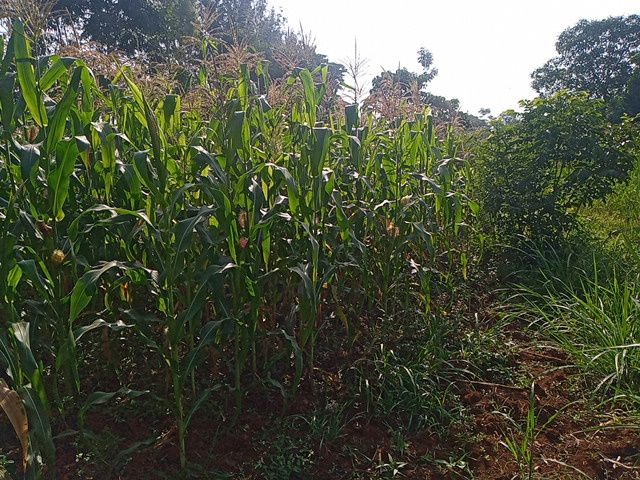

In [ ]:
from PIL import Image
from IPython.display import display
import os

# Directory containing the images
images_directory = '/content/images'  # Replace with the actual path

# List all files in the directory
image_files = os.listdir(images_directory)

if not image_files:
    print("No image files found.")
else:
    # Get the full path for the first image (change the index as needed)
    first_image_path = os.path.join(images_directory, image_files[0])

    print("Full path to the first image:", first_image_path)

    # Load and display the image
    image = Image.open(first_image_path)
    display(image)


In [ ]:
import pandas as pd

df = pd.read_csv('Train.csv')
df

,ID,damage,filename
0,ID_UBHORS,WD,d036341be8d6cd59851cb80bcc9a70cc9fbdba30.jpg
1,ID_9DSOLZ,G,9ea16180c50d0cd539897eefbfe585314e50a56b.jpg
2,ID_JHLM0G,G,b6b564844041bc68774a553eaf43d61654657dd9.jpg
3,ID_ATREIJ,DR,62262859f0cd411aaf484082ed3ef0b625bc452a.jpg
4,ID_L2GAD6,G,03b6e2a8ace7cb611eccba289f3c83d9bd497584.jpg
...,...,...,...
26063,ID_SQQ5T2,DR,dd3f7966864f9466b9d57714983c3259c905f1e7.jpg
26064,ID_T5WAM0,G,cab5d10958f28b17d887748f9cd1d35796db0902.jpg
26065,ID_9W6G7O,G,7feedaf352fe16b24454fc4ee283bb85c3f17ccb.jpg
26066,ID_YQ07UW,G,f295f949ece1867921363df9e4c3d17e8d7fc22f.jpg


In [ ]:
import pandas as pd
import os

# Load train.csv
 # Replace with the actual path
train_df = df

# Get the list of filenames from train.csv
train_filenames = train_df['filename']

# Specify the directory containing your downloaded images
#images_directory = "/content/images"  # Replace with the actual path

# Get the list of all files in the images directory
all_files = os.listdir(images_directory)

# Filter only image files (e.g., JPEG and PNG)
image_files = [file for file in all_files if file.lower().endswith(('.jpg', '.png'))]

# Filter the downloaded images based on filenames in train.csv
images_in_train = [file for file in image_files if file in train_filenames.values]

# Count the number of images relevant to the training set
num_images_train = len(images_in_train)

# Print the number of images relevant to the training set
print(f"Number of images relevant to the training set: {num_images_train}")


Number of images relevant to the training set: 26068


#  **EXPLORATORY DATA ANALYSIS**

**Checking For Missing Values**

In [ ]:
# Check missing values
print(df.isnull().sum())


ID          0
damage      0
filename    0
dtype: int64


I have no missing values

**Explore Unique Values in 'damage' Column**

In [ ]:
# Explore unique values in the 'damage' column
print(df['damage'].value_counts())


G        11623
WD        9238
DR        4516
other      419
ND         272
Name: damage, dtype: int64


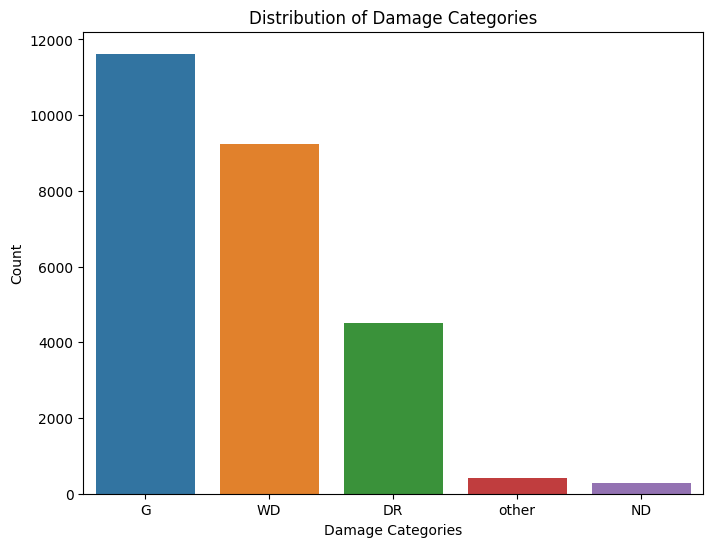

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each damage category
damage_counts = df['damage'].value_counts()

# Plotting the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=damage_counts.index, y=damage_counts.values)
plt.title('Distribution of Damage Categories')
plt.xlabel('Damage Categories')
plt.ylabel('Count')
plt.show()


The data exhibits significant class imbalance. The "G"(Good) and "WD" (Weed)categories dominate, making up almost 85% of the data. In contrast, "other"(-Disease, Pest, Wind) and "ND" (Nutrient Deficient) categories have very few images, which could pose challenges for training a model to reliably classify these less frequent damage types

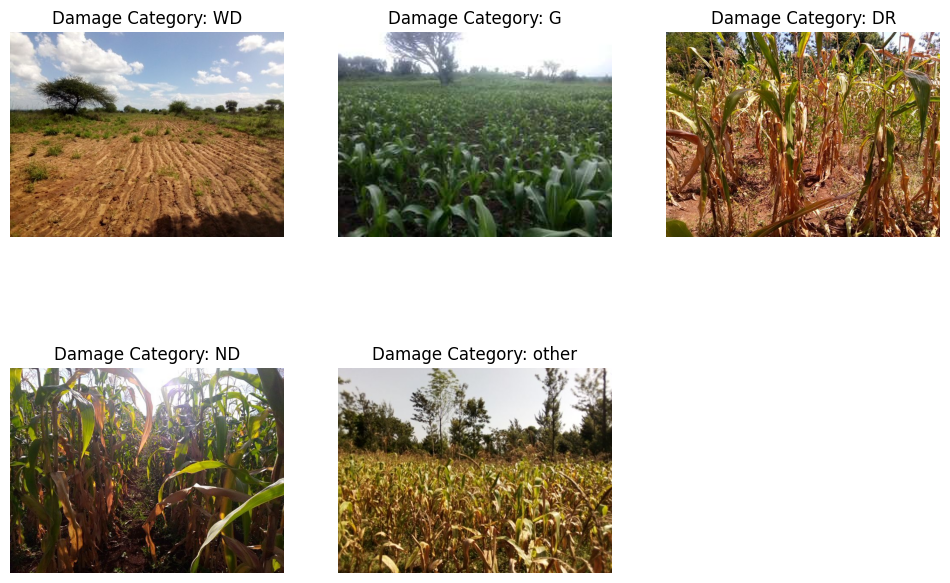

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and display an example image for each category
def display_example_images(df):
     # Create a figure to display images
    plt.figure(figsize=(12, 8))

    # Iterate through unique damage categories
    for damage_category in df['damage'].unique():
        # Get a sample filename for the category
        sample_filename = df[df['damage'] == damage_category]['filename'].iloc[0]

        # Construct the full path to the image
        image_path = os.path.join('/content/images', sample_filename)

        # Load and display the image
        image = Image.open(image_path)
        plt.subplot(2, 3, list(df['damage'].unique()).index(damage_category) + 1)
        plt.imshow(image)
        plt.title(f'Damage Category: {damage_category}')
        plt.axis('off')

    plt.show()

# Call the function with your DataFrame
display_example_images(df)


**Defining a function to get image sizes**

In [ ]:
from PIL import Image
import os

def get_image_sizes(directory):
    image_sizes = {}

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Adjust the file extension based on your dataset
            file_path = os.path.join(directory, filename)
            with Image.open(file_path) as img:
                width, height = img.size
                image_sizes[filename] = (width, height)

    return image_sizes

# Specify the directory containing your images
image_directory = "/content/images"  # Replace with the actual path

# Get image sizes
sizes = get_image_sizes(image_directory)

# Add the sizes to your dataframe
df['image_sizes'] = df['filename'].map(sizes)


In [ ]:
df.head()

,ID,damage,filename,image_sizes
0,ID_UBHORS,WD,d036341be8d6cd59851cb80bcc9a70cc9fbdba30.jpg,"(640, 480)"
1,ID_9DSOLZ,G,9ea16180c50d0cd539897eefbfe585314e50a56b.jpg,"(320, 240)"
2,ID_JHLM0G,G,b6b564844041bc68774a553eaf43d61654657dd9.jpg,"(640, 480)"
3,ID_ATREIJ,DR,62262859f0cd411aaf484082ed3ef0b625bc452a.jpg,"(640, 480)"
4,ID_L2GAD6,G,03b6e2a8ace7cb611eccba289f3c83d9bd497584.jpg,"(320, 240)"


**Let's Investigate the Image Size Distribution**

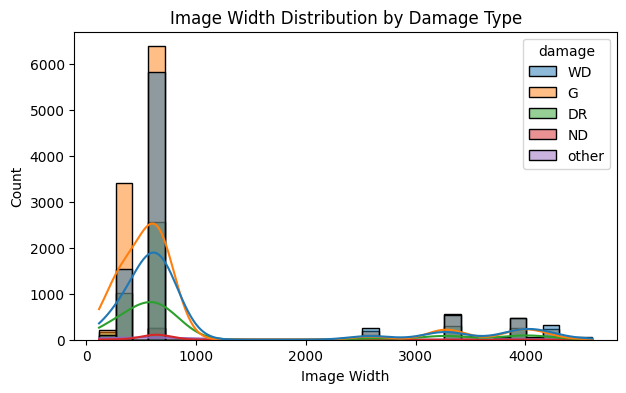

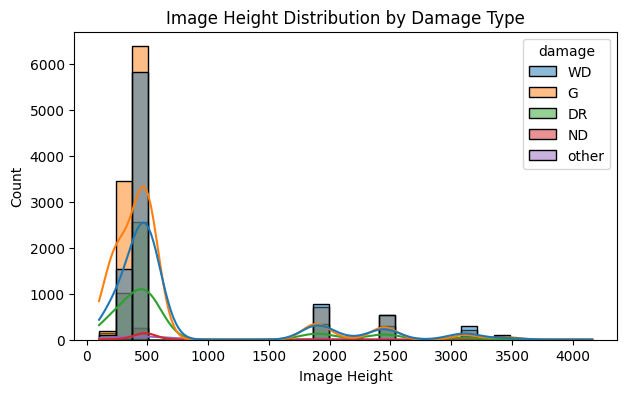

In [ ]:

# Extract width and height as separate columns
df[['width', 'height']] = pd.DataFrame(df['image_sizes'].tolist(), index=df.index)

# Visualize distribution of image widths
plt.figure(figsize=(7, 4))
sns.histplot(df, x='width', hue='damage', bins=30, kde=True)
plt.title('Image Width Distribution by Damage Type')
plt.xlabel('Image Width')
plt.ylabel('Count')
plt.show()

# Visualize distribution of image heights
plt.figure(figsize=(7, 4))
sns.histplot(df, x='height', hue='damage', bins=30, kde=True)
plt.title('Image Height Distribution by Damage Type')
plt.xlabel('Image Height')
plt.ylabel('Count')
plt.show()



*  The majority of images fall within the 2000-3500 pixel range for both height and width, indicating a dataset dominated by relatively large images.

*  This has implications for:

     * Model selection: I might need computationally efficient models suitable for large images or consider downsampling strategies.

     * Pre-processing: Resizing might be necessary, but with caution to preserve details, especially for categories with wider size ranges.

     * Data augmentation: Padding or random cropping could be crucial, especially for the width dimension due to observed variations.










**Variations across different categories**

WD (weed) and G (good) categories show wider ranges and larger widths compared to DR (drought), ND (nutrient deficient), and other.
This suggests:

   * Category-specific pre-processing: Different resizing or augmentation strategies might be needed for each category to address size variations and optimize feature extraction.

   * Model interpretation: Analyze how the model's performance varies for different size ranges and categories related to width.

**Correlation Analysis:**

Explore if there are any correlations between different types of damages and specific image properties.

<ipython-input-25-398805da50fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df[['width', 'height']] = pd.DataFrame(correlation_df['image_sizes'].tolist(), index=correlation_df.index)
<ipython-input-25-398805da50fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df[['width', 'height']] = pd.DataFrame(correlation_df['image_sizes'].tolist(), index=correlation_df.index)


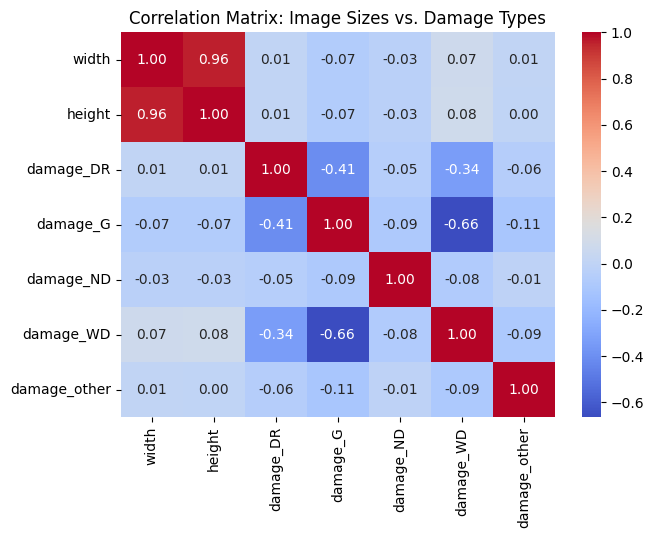

In [ ]:
# Create a new DataFrame for correlation analysis
correlation_df = df[['image_sizes', 'damage']]

# Extract width and height as separate columns
correlation_df[['width', 'height']] = pd.DataFrame(correlation_df['image_sizes'].tolist(), index=correlation_df.index)

# Drop the original 'image_sizes' column
correlation_df = correlation_df.drop('image_sizes', axis=1)

# Encode categorical variable 'damage' for correlation analysis
correlation_df = pd.get_dummies(correlation_df, columns=['damage'])

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix with a smaller plot
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Image Sizes vs. Damage Types')
plt.show()


Most correlations are relatively weak, with values ranging from -0.2 to 0.2. This suggests that image size doesn't have a strong, direct impact on the presence of any specific damage type.

**Sample Image Visualization**

In [ ]:
from PIL import Image
import IPython.display as display

# Display a few sample images for each damage type with image size
sample_images = df.groupby('damage').apply(lambda x: x.sample(3))['filename']

for filename in sample_images:
    image_path = f"/content/images/{filename}"
    image = Image.open(image_path)

    # Get image size
    image_size = df[df['filename'] == filename]['image_sizes'].values[0]

    # Display image and size
    display.display(image)
    print(f"Damage Type: {df[df['filename'] == filename]['damage'].values[0]}")
    print(f"Image Size: {image_size}")
    print("-------------------------------")


# **Pre-processing for Modelling**



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming df is your DataFrame containing image information
# 'image_directory' is the path to the directory containing your images

# Define the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split dataset into training and validation sets
    rotation_range=20,     # Random rotation (degrees)
    width_shift_range=0.2, # Random horizontal shift
    height_shift_range=0.2,# Random vertical shift
    shear_range=0.2,       # Shear intensity
    zoom_range=0.2,        # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    vertical_flip=True     # Random vertical flip
)

# Define the ImageDataGenerator flow_from_dataframe for training set
train_generator = datagen.flow_from_dataframe(
    df,
    directory=images_directory,  # Replace with the actual path
    x_col='filename',
    y_col='damage',
    target_size=(224, 224),  # Adjust based on EfficientNet variant
    batch_size=32,
    class_mode='categorical',  # Assuming 'damage' column is categorical
    subset='training'
)

# Define the ImageDataGenerator flow_from_dataframe for validation set
validation_generator = datagen.flow_from_dataframe(
    df,
    directory=images_directory,  # Replace with the actual path
    x_col='filename',
    y_col='damage',
    target_size=(224, 224),  # Adjust based on EfficientNet variant
    batch_size=32,
    class_mode='categorical',  # Assuming 'damage' column is categorical
    subset='validation'
)


Found 20855 validated image filenames belonging to 5 classes.
Found 5213 validated image filenames belonging to 5 classes.


****